In [14]:
%load_ext autoreload
%autoreload 2

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from visualenvironment import VisualEnvironment

[25. 20.]


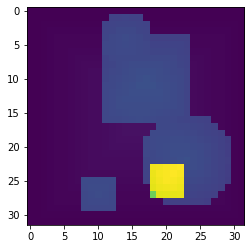

In [17]:
env1 = VisualEnvironment()
print (env1.robot_center)
env1.plot_data()

[25. 20.]


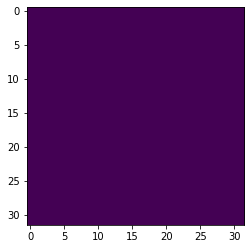

In [18]:
env2 = VisualEnvironment(includeRobot=False, addObstacles=False, grad_bg=0.0, grad_robot=0.0)
print (env1.robot_center)
env2.plot_data()

Direction [-1  1]


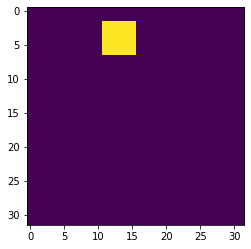

Environment 0
Control [-1.  1.]
Robot Center: [ 4. 13.]
Max: 255.0
Min: 0.0
Number of changing elements (25,)


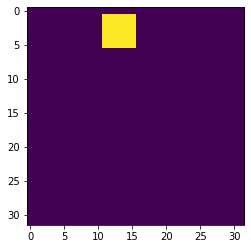

Environment 1
Control [-1.  0.]
Robot Center: [ 3. 13.]
Max: 255.0
Min: 0.0
Number of changing elements (25,)


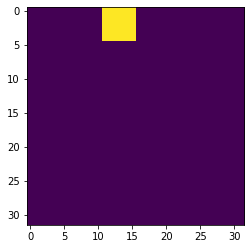

Environment 2
Control [-3.  0.]
Robot Center: [ 2. 13.]
Max: 255.0
Min: 0.0
Number of changing elements (25,)


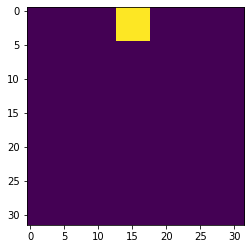

Environment 3
Control [-3.  2.]
Robot Center: [ 2. 15.]
Max: 255.0
Min: 0.0
Number of changing elements (25,)


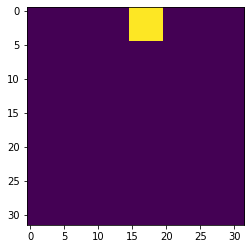

Environment 4
Control [-2.  2.]
Robot Center: [ 2. 17.]
Max: 255.0
Min: 0.0
Number of changing elements (25,)


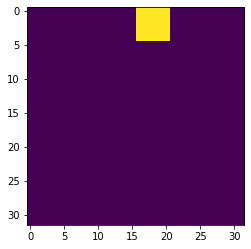

Environment 5
Control [-1.  1.]
Robot Center: [ 2. 18.]
Max: 255.0
Min: 0.0
Number of changing elements (25,)


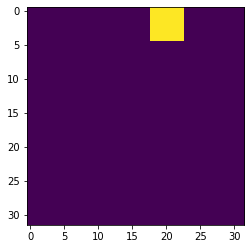

Environment 6
Control [-3.  2.]
Robot Center: [ 2. 20.]
Max: 255.0
Min: 0.0
Number of changing elements (25,)


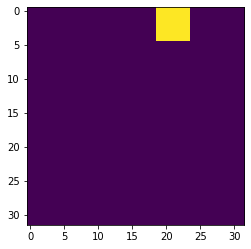

Environment 7
Control [-3.  1.]
Robot Center: [ 2. 21.]
Max: 255.0
Min: 0.0
Number of changing elements (25,)


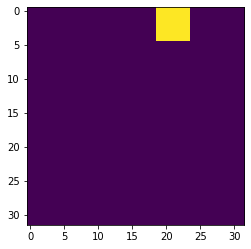

Environment 8
Control [-1.  0.]
Robot Center: [ 2. 21.]
Max: 255.0
Min: 0.0
Number of changing elements (25,)


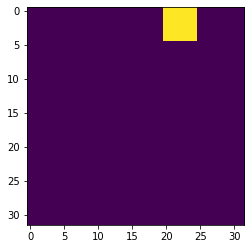

Environment 9
Control [-3.  1.]
Robot Center: [ 2. 22.]
Max: 255.0
Min: 0.0
Number of changing elements (25,)


In [19]:
opt = np.get_printoptions()
np.set_printoptions(threshold=np.inf)

envs, controls, direction = env2.generate_trajectory(length=10)
print ('Direction {}'.format(direction))
for i in range(len(envs)):
#     plt.subplot(3, 4, i+1)
    envs[i].build_data()
    fig = plt.figure()
    plt.imshow(envs[i].data)
    plt.show()
    print ('Environment {}'.format(i))
    print ('Control {}'.format(controls[i]))
    print ('Robot Center: {}'.format(envs[i].robot_center))
    print ('Max: {}'.format(np.max(envs[i].data)))
    print ('Min: {}'.format(np.min(envs[i].data)))
    diff = envs[i].data - env2.data
    print ('Number of changing elements {}'.format(diff[diff > 0].shape))

In [30]:
print (envs[0].data)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.

In [20]:
# data sample = robot_pos (x_t), image (I_t). For now, no obstacles, later include that data as well.
def generate_robot_data(no_of_samples):
    img_size = 32*32
    x_size = 2
    sample_size = x_size + img_size
    data_samples = np.zeros((no_of_samples, sample_size))
    for i in range(no_of_samples):
        env = VisualEnvironment(addObstacles=False, grad_bg=0.0, grad_robot=0.0)
        env.build_data()
        data_samples[i, :] = np.concatenate((env.robot_center,env.data.reshape(-1)))
    return data_samples

# data sample = x_t, x_t+1, x_empty, u
# problem sample = x_start, x_goal, x_empty
def generate_trajectory_data(no_of_trajectories):
    traj_length = 11
    x_size = 32*32
    u_size = 2
    problem_size = 3*x_size
    data_size = problem_size + u_size
    problems = np.zeros((no_of_trajectories, problem_size))
    data = np.zeros((no_of_trajectories*(traj_length-1), data_size))
    for i in range(no_of_trajectories):
        empty_env = VisualEnvironment(includeRobot=False)
        empty_env.build_data()
        x_empty = empty_env.data.reshape(-1)
        envs, controls = empty_env.generate_trajectory(length=traj_length)
        for j in range(traj_length):
            envs[j].build_data()
        x_start = envs[0].data.reshape(-1)
        x_goal = envs[traj_length-1].data.reshape(-1)
        problems[i,:] = np.concatenate((x_start, x_goal, x_empty))
        for j in range(traj_length-1):
            data_sample = np.concatenate((envs[j].data.reshape(-1), envs[j+1].data.reshape(-1), x_empty, controls[j+1]))
            data[i*(traj_length-1)+j,:] = data_sample
    return problems, data

In [ ]:
problem_sample, data_samples = generate_trajectory_data(3)

In [ ]:
print (problem_sample.shape)
print (data_samples.shape)

In [23]:
data_samples = generate_robot_data(3)
print (data_samples.shape)

(3, 1026)


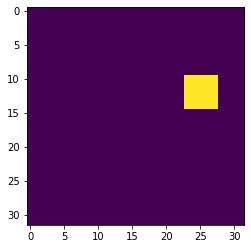

In [24]:
fig = plt.figure()
plt.imshow(data_samples[0, 2:].reshape((32, 32)))
plt.show()

In [34]:
root_folder = 'data/img_auto_encoder/version2/'

train_samples = generate_robot_data(10000)
np.savetxt(root_folder+'train.csv', train_samples, fmt="%5.1f", delimiter=",")
print ('Training data generated')

test_samples = generate_robot_data(1000)
np.savetxt(root_folder+'test.csv', test_samples, fmt="%5.1f", delimiter=",")
print ('Test data generated')

Training data generated
Test data generated


In [25]:
np.set_printoptions(**opt)